# SR-Dyna: Successor Representation & Offline Replay
## Learning Predictive Representations with SR Dyna

Here we will use a SR-DYNA class where the agent learns predictive (successor) representations that guide its decisions, and updates them via offline replay after each episode. 

We compare the number of episodes it takes the algorithm to converge under different learning rates and discount parameters. We also compare this outcome to SR-(only) learners.

For simplicity we will look at Experiment 1 from Momennejad et al. 2017, where there are no actions to take during learning and the agent is moved from state to state. The only choice is during test: a decision between the two sequences. 

This notebook focuses on simply learning with SRDyna, compares its performance in terms of the number of episodes till convergence. The SR-Dyna agent learns SR and values weights, update SR via offline replay, compute value function using this learned information, and then the decision will pick the starting state with the highest value. We then compare the results with those of an SR-only algorithm in terms of number of episodes to convergence. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math 
from SRdyna_nathum_exp1 import SRDyna_nathum_exp1
from SR_Dyna_no_action import SR_Dyna_no_action
import ida_envs
from mpl_toolkits import mplot3d # for 3D plots
import time
from tqdm import tqdm

# Plot the graph of Experiment 1
This function uses the graphviz librart to plot the graph of the experiment as a separate window and saves it as pdf. 

In [2]:
# POP UP WINDOW ALERT!
ida_envs.plot_env1() 

# Train an SR agent to make decisions in the environment
1) Set up the environment envstep
2) Use a function that (a) initializes an agent from the class SR_no_action given learning rate (alpha) and discount (gamma) parameters, and (b) has the agent interact with the environment and learn what to do (cf: SRclass_nathum_exp1.py)
3) Compute the value of options and see which starting state the agent uses. 

==> Change parameters and rerun this to compare matrices.

[ 89.61227152   8.99267134 149.24898796  14.98714062 248.58848403
  24.97669059]
The best starting state is: 0 or state 1
################################
gamma: 0.6, alpha: 0.1
Best starting state is: 0 or state 1


array([1. , 1. , 1. , 1. , 2.5, 2.5])

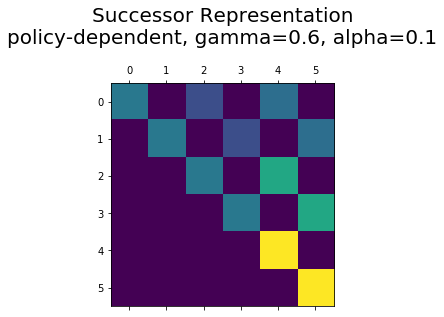

In [17]:
# Set discount factor & learning rate
gamma, alpha = 0.6, .1

# 1) create the environment
envstep = ida_envs.generate_nathumbeh_env1()

# 2) create SR agent, let it learn the environment
M, W, mem, total_episodes = SRDyna_nathum_exp1(envstep, gamma, alpha)

# 3) compute value using SR & value weights
v=M@W 
print(v)
print(f'The best starting state is: {np.argmax([v[0],v[1]])} or state {np.argmax([v[0],v[1]])+1}')
print('################################')
print(f'gamma: {gamma}, alpha: {alpha}')
print(f'Best starting state is: {np.argmax([v[0],v[1]])} or state {np.argmax([v[0],v[1]])+1}')
plt.matshow(M)
plt.title(f'Successor Representation\npolicy-dependent, gamma={gamma}, alpha={alpha}\n', fontsize=20)



# get the eigenvector of the policy dependent successor representation
we2, ve2 = np.linalg.eig(M)
we2

[809.99255533  80.98509092 899.9911219   89.98125419 999.98992098
  99.97998657]
The best starting state is: 0 or state 1
################################
gamma: 0.9, alpha: 0.9
Best starting state is: 0 or state 1


array([ 1.,  1.,  1.,  1., 10., 10.])

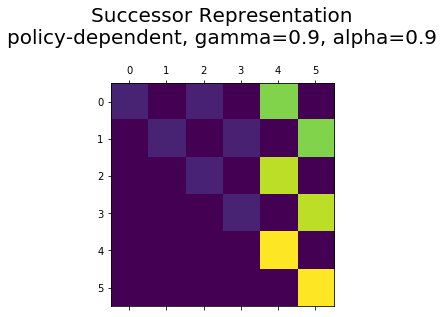

In [16]:
# Set discount factor & learning rate
# just comparing things with different gamma and alpha
gamma, alpha = 0.9, .9

# 1) create the environment
envstep = ida_envs.generate_nathumbeh_env1()

# 2) create SR agent, let it learn the environment
M, W, mem, total_episodes = SRDyna_nathum_exp1(envstep, gamma, alpha)

# 3) compute value using SR & value weights
v=M@W 
print(v)
print(f'The best starting state is: {np.argmax([v[0],v[1]])} or state {np.argmax([v[0],v[1]])+1}')
print('################################')
print(f'gamma: {gamma}, alpha: {alpha}')
print(f'Best starting state is: {np.argmax([v[0],v[1]])} or state {np.argmax([v[0],v[1]])+1}')
plt.matshow(M)
plt.title(f'Successor Representation\npolicy-dependent, gamma={gamma}, alpha={alpha}\n', fontsize=20)


we2, ve2 = np.linalg.eig(M)
we2

# Policy-independent SR & its Eigenvector
Policy-independent SR is a successor representation that is learned under a random policy, i.e., as if rewards were uniformly distribtued across an open field. It can be estimated with a simple equation using the transition matrix, T, as such:

M = inv(I - gamma*T)

Here we plot the transition matrix (1-step transition probabilities) and its successor representaiton. Compare this successor representation (for different gammas) directly computed from the transition matrix and its eigenvectors to the policy-dependent successor representations computed above with the same gamma, and different alphas, and their eigenvectors. What are the differences? How do gammas and alphas change the shape of SRs and Eigs?

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Eigs: (compare to eigs above)
[0. 0. 0. 0. 0. 0.]


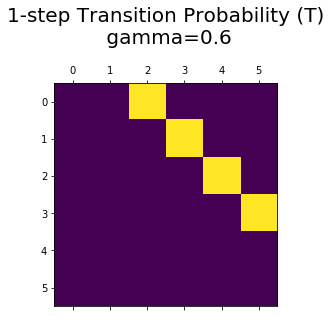

In [27]:
T = ida_envs.get_T(envstep)
print(T)
SRT=get_SR_T(T, gamma)
we2, ve2 = np.linalg.eig(T)
plt.matshow(T)
plt.title(f'1-step Transition Probability (T)\n gamma={gamma}\n', fontsize=20)
print('\nEigs: (compare to eigs above)')
print(we2)

T:
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Eigs: (compare to eigs above)
[1. 1. 1. 1. 1. 1.]


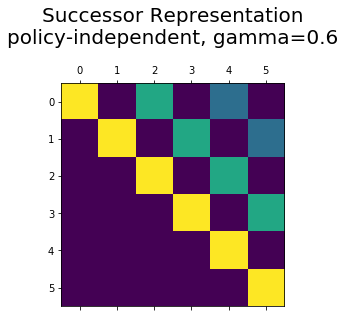

In [25]:
# the function below is also implemented in idaenvs.py, but i repeat it here for clarity of use
def get_SR_T(T, gamma):    
    I = np.identity(len(T))
    SR = np.linalg.inv(I - gamma * T )
    return SR

T = ida_envs.get_T(envstep)
SRT=get_SR_T(T, gamma)
we2, ve2 = np.linalg.eig(SRT)
plt.matshow(SRT)
plt.title(f'Successor Representation\npolicy-independent, gamma={gamma}\n', fontsize=20)
we2

print('T:')
print(T)
print('\nEigs: (compare to eigs above)')
print(we2)

# How long does learning take?

There are two parameters involved in how long it takes to learn: the learning rate and the discount factor or the scale of the predictive representations that are learned. Below we generate many successor representation matrices with different alpha and gamma parameters, compute the number of episodes it takes to converge in each case, and present the 3D plot for comparison.

In [6]:
alphas = [.1, .2, .3, .4, .6, .8]
gammas = [.1, .2, .3, .4, .6, .8]

def f(X , Y):
    # [x[:] for x in [[1] * 10] * 10]
    f= np.zeros(shape=X.shape)
    ax = 0
    #print(np.shape(f))
    for alpha in X[0]:  
        gx = 0

        for gamma in Y[0]:            
            #print(f'Learning for alpha: {alpha} and gamma: {gamma}')
            M, W, mem, total_episodes = SRDyna_nathum_exp1(envstep, gamma, alpha)
            f[ax][gx]=total_episodes
            gx+=1
        ax +=1        
    return f

# learn SR-Dyna for each alpha & gamma 100 times, take mean
for zx in tqdm(range(100)):
    X, Y = np.meshgrid(alphas, gammas)
    Z = f(X, Y)
    if zx==0:
        meanZSRyna=Z
    else:
        meanZSRyna = (Z + meanZSRyna)/2

100%|██████████| 100/100 [01:14<00:00,  1.39it/s]


# Comparing #episodies to converegnce (mean of 100 repetition)

The 3D plot below compares number of episodes to converegnce for different learning rates and gammas. 
We run the model with each alpha and gamma parameter 100 times and take the mean. 
The 3D plot below shows the outcome.

Minimum number of episodes to convergence: 2.0715425139233217
Max number of episodes to convergence: 89.39242467671734


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


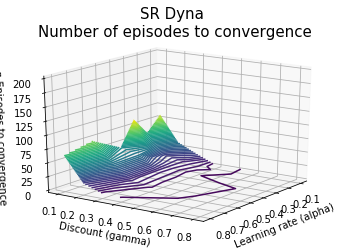

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 35)
ax.contour3D(X, Y, meanZSRyna, 50)
ax.set_xlabel('Learning rate (alpha)')
ax.set_zlim(0, 200) # set Z limit to 200 to compare to SR-ONLY's 3D plot
ax.set_ylabel('Discount (gamma)')
ax.set_zlabel('n Episodes to convergence');

print(f'Minimum number of episodes to convergence: {np.min(meanZSRyna)}')
print(f'Max number of episodes to convergence: {np.max(meanZSRyna)}')
ax.set_title('SR Dyna \nNumber of episodes to convergence', fontsize=15);
np.argmin(meanZSRyna)
fig.savefig(f'SRDYNA_contour_episodes.pdf{int(time.clock())}.pdf' )

# Same 3D plot, different styles, Z limit -> 80 (max episodes for SR-Dyna)

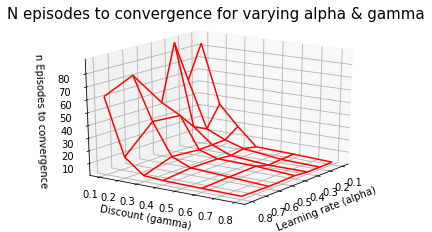

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 35)
ax.plot_wireframe(X, Y, meanZSRyna, color='red')
ax.set_xlabel('Learning rate (alpha)')
ax.set_ylabel('Discount (gamma)')
ax.set_zlabel('n Episodes to convergence');
ax.set_title('N episodes to convergence for varying alpha & gamma', fontsize=15);

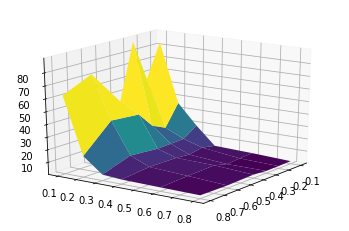

In [9]:
ax = plt.axes(projection='3d')
ax.view_init(20, 35)
ax.plot_surface(X, Y, meanZSRyna, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

# II. Comparison of SR-Dyna with SR-only

Below we provide the same 3D plots as provided above for learning SR only (no replay) across different learning rates (alphas) and discount parameters (gammas).


In [10]:
from SRclass_nathum_exp1 import SRclass_nathum_exp1
from SR_no_action import SR_no_action # importing an SR only learning class

alphas = [.1, .2, .3, .4, .6, .8]
gammas = [.1, .2, .3, .4, .6, .8]

def fSR(X , Y):
    # [x[:] for x in [[1] * 10] * 10]
    fSR= np.zeros(shape=X.shape)
    ax = 0
    #print(np.shape(f))
    for alpha in X[0]:  
        gx = 0
        #print(alpha)
        for gamma in Y[0]:            
            #print(f'Learning for alpha: {alpha} and gamma: {gamma}')
            M, W, mem, total_episodes = SRclass_nathum_exp1(envstep, gamma, alpha)
            fSR[ax][gx]=total_episodes
            gx+=1
        ax +=1        
    return fSR

# for the 3D plot: 
# learn SR for each alpha & gamma 100 times, take mean

for zx in tqdm(range(100)):
    X, Y = np.meshgrid(alphas, gammas)
    Z = fSR(X, Y)
    if zx==0:
        meanZSR=Z
    else:
        meanZSR = (Z + meanZSR)/2

100%|██████████| 100/100 [00:50<00:00,  1.96it/s]


Minimum number of episodes to convergence: 15.171466559282253
Max number of episodes to convergence: 196.5612717312022


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


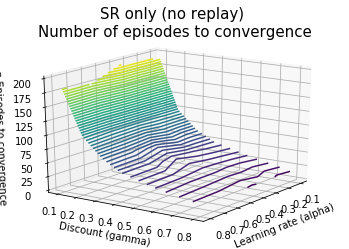

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 35)
ax.contour3D(X, Y, meanZSR, 50)
ax.set_xlabel('Learning rate (alpha)')
ax.set_zlim(0, 200) # set Z limit to 200 to compare to SR-ONLY's 3D plot
ax.set_ylabel('Discount (gamma)')
ax.set_zlabel('n Episodes to convergence');
print(f'Minimum number of episodes to convergence: {np.min(meanZSR)}')
print(f'Max number of episodes to convergence: {np.max(meanZSR)}')
ax.set_title('SR only (no replay) \nNumber of episodes to convergence', fontsize=15);
np.argmin(meanZSR)
fig.savefig(f'contour_episodes{int(time.clock())}.pdf' )